## Regresion lineal 


In [1]:
import pandas as pd
CO2Data = pd.read_csv("Terminos_lagoon_TA_DIC_2023_RawData.csv")

## Diagrama de dispersión con regresión lineal = scipy.stats.linregress
Una función para realizar regresiones lineales con dos variables. obtenemos la pendiente, el origen, el R cuadrado, el valor p y el error estándar. 

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lab\AppData\Local\Temp\ipykernel_4600\841685765.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
C:\Users\Lab\AppData\Local\Temp\ipykernel_4600\841685765.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)


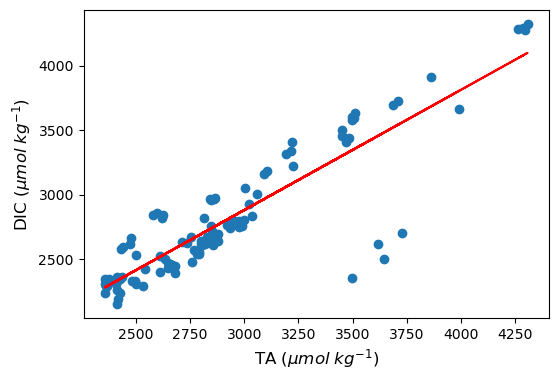

Slope: 0.9329743239047245


In [2]:
import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [3]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.7784247010713174
p_value: 8.179416835110045e-36
slope: 0.9329743239047245
intercept: 80.30614134209554


Regresión por mínimos cuadrados (MCO): scipy.stats.linregress

Una herramienta potente y detallada de regresión lineal compatible con regresión lineal simple y múltiple. Proporciona un informe estadístico completo que incluye valores p, intervalos de confianza y pruebas diagnósticas. 


In [4]:
import statsmodels.api as sm
import numpy as np

# Define the independent and dependent variables
x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        dic_micromol_kg   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     365.4
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           8.18e-36
Time:                        19:53:38   Log-Likelihood:                -728.75
No. Observations:                 106   AIC:                             1462.
Df Residuals:                     104   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             80.3061    144.021      0.

In [5]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.778
✔️ Good model fit: Explains most of the variance.

Coefficients:
- const: Coef = 80.3061, p = 0.5783 → ⚠️ Not significant (p ≥ 0.05)
- ta_micromol_kg: Coef = 0.9330, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (ta_micromol_kg): 0.9330, p = 0.0000 → ✔️ Significant

Standard Error of the model: 236.4180


## salinidad y temperatura 

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Lab\AppData\Local\Temp\ipykernel_4600\2518021532.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Temperature ($^\circ C$)', fontsize = 12)


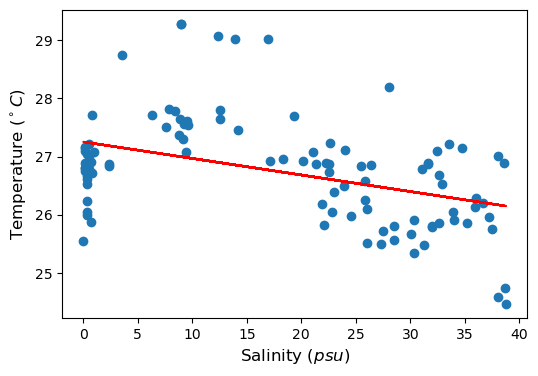

Slope: -0.028458717486946162


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['sal_psu']
y = CO2Data['temp_c']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('Salinity ($psu$)', fontsize = 12, )
plt.ylabel('Temperature ($^\circ C$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'SAL_TEMP_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [8]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -0.028458717486946162
intercept: 27.25200067150795


In [9]:
import statsmodels.api as sm
import numpy as np

# Define the independent and dependent variables
x = CO2Data['sal_psu']
y = CO2Data['temp_c']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 temp_c   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     22.44
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           6.88e-06
Time:                        20:01:24   Log-Likelihood:                -130.39
No. Observations:                 106   AIC:                             264.8
Df Residuals:                     104   BIC:                             270.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2520      0.132    206.412      0.0

In [10]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.177
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 27.2520, p = 0.0000 → ✔️ Significant (p < 0.05)
- sal_psu: Coef = -0.0285, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (sal_psu): -0.0285, p = 0.0000 → ✔️ Significant

Standard Error of the model: 0.8359


## Dic y salinidad

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lab\AppData\Local\Temp\ipykernel_4600\2520327831.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12, )


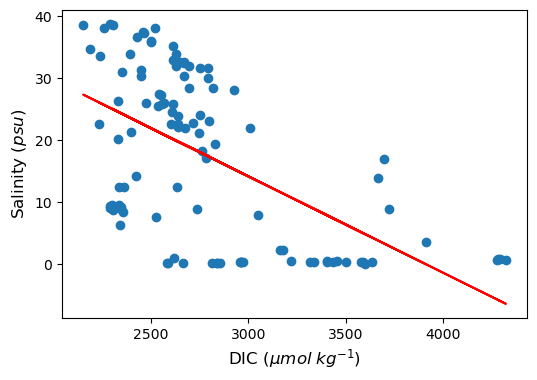

Slope: -0.015537057058518267


In [11]:
import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['dic_micromol_kg']
y = CO2Data['sal_psu']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('Salinity ($psu$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_SAL_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [12]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.32710473310227767
p_value: 1.51441040237653e-10
slope: -0.015537057058518267
intercept: 60.80437362978961


In [13]:
import statsmodels.api as sm
import numpy as np

# Define the independent and dependent variables
x = CO2Data['dic_micromol_kg']
y = CO2Data['sal_psu']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                sal_psu   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     50.56
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.51e-10
Time:                        20:13:50   Log-Likelihood:                -405.41
No. Observations:                 106   AIC:                             814.8
Df Residuals:                     104   BIC:                             820.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.8044      6.210     

In [14]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.327
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 60.8044, p = 0.0000 → ✔️ Significant (p < 0.05)
- dic_micromol_kg: Coef = -0.0155, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (dic_micromol_kg): -0.0155, p = 0.0000 → ✔️ Significant

Standard Error of the model: 11.1923
